In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation
from utility_classes.historical_data_processor import FTXDataProcessor
acc = FTXDataProcessor(api_key=FTX_API_KEY, api_secret=FTX_API_SECRET)
corr = Correlation(spread_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spreads')
plt.rcParams['figure.figsize'] = [20, 20]


# Roadmap
## First, cointegration identification
### Use Pearson's coefficient to visualize correlation 
### Use past data for data training, selecting cointegrated pairs by using coint function from statsmodels.tsa.stattools 

## Pearson's coefficient for spreads


### get the past futures expiration dates

In [2]:
acc.get_expired_futures_dates()


expiration date: 0326 | Date March 2021
expiration date: 1225 | Date December 2020
expiration date: 0925 | Date September 2020
expiration date: 0626 | Date June 2020
expiration date: 20200327 | Date March 2020
expiration date: 20191227 | Date December 2019
expiration date: 20190927 | Date September 2019
expiration date: 20190628 | Date June 2019
expiration date: 20190329 | Date March 2019
BTC-0626 data is missing from FTX end


### draw the heatmap for futures expiring in 2020/09/25 and 2020/12/25, with minimum value set to 0 
### *this could take a up to 30 seconds to process

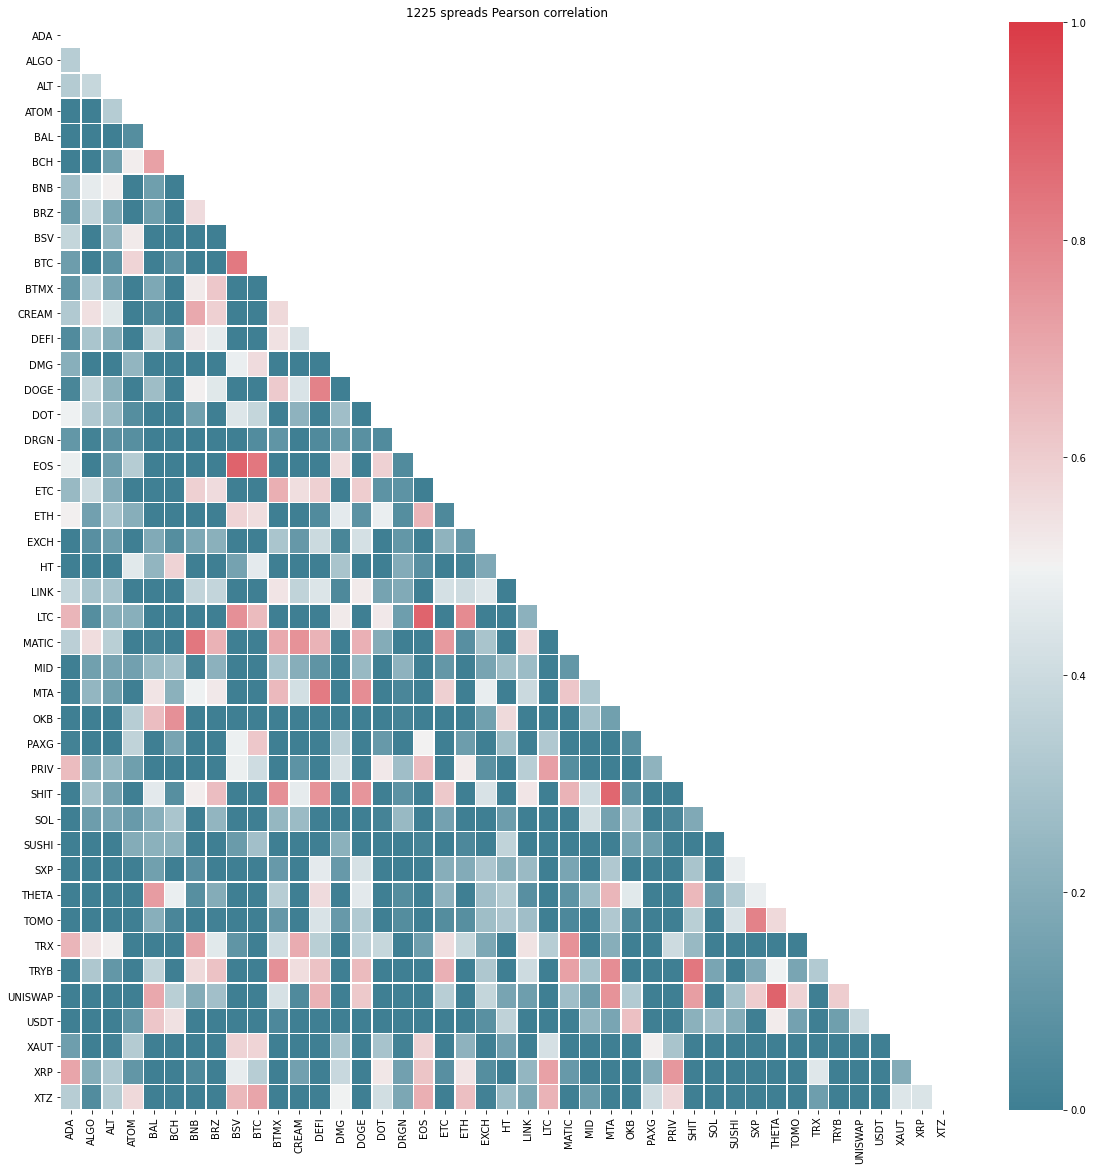

spreads from 2020-09-11T18:40:00+00:00 to 2020-12-25T03:00:00+00:00
['BAL', 'BNB', 'BTMX', 'CREAM', 'MATIC', 'MTA', 'OKB', 'PAXG', 'TOMO', 'XAUT'] have missing values


In [3]:
corr.spreads_correlation_heatmap(futures_date='1225', triangular=True, min_cor=0)

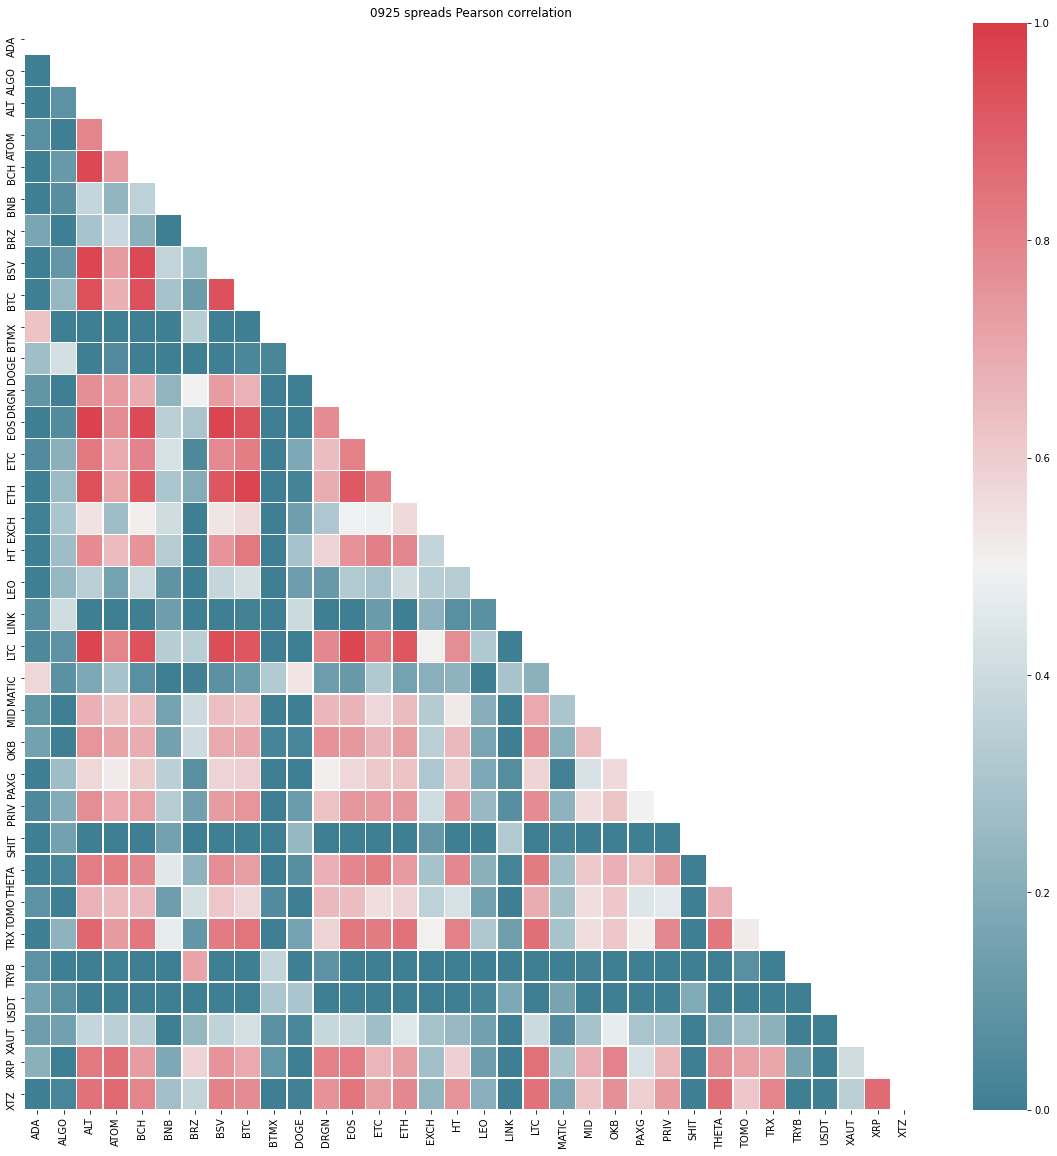

spreads from 2020-06-08T06:22:00+00:00 to 2020-09-25T02:59:00+00:00
['ALGO', 'ALT', 'BCH', 'BNB', 'BSV', 'DOGE', 'DRGN', 'EOS', 'ETC', 'ETH', 'LEO', 'LINK', 'MATIC', 'OKB', 'PAXG', 'PRIV', 'TOMO', 'TRX', 'USDT', 'XRP', 'XTZ'] have missing values


In [4]:
corr.spreads_correlation_heatmap(futures_date='0925', triangular=True, min_cor=0)
